Export Controlled: ECCN EAR1E998

Warning: This document contains technical data whose export is restricted by the Bureau of Industry & Security’s Export Administration Regulations and cannot be exported or re-exported without the authorization of the U.S. government. Violations of these export laws are subject to severe criminal penalties. Diversion contrary to U.S. law is prohibited.

Start with:

* supply power data features for multiple VAVs

Objective:

* anomaly comparisons between multiple VAVs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import altair as alt
alt.renderers.enable('notebook')
import seaborn as sns

from UTCDAL.Design.AnomalyDetection import UnsupervisedAD, normalize, select_kbest
from UTCDAL.Design.TimeseriesAnalysis import extract_features, features

# Short Intro

We have downloaded all the VAV data from UTRC L bldg from 2017/1/1 to 2018/6/29. This notebook shows how we applied the anomaly detection algorithm to assist us finding possible faults. In this case study, we focus on the VAV damper position signal.

---

Feature extraction were conducted on each damper beforehand, and saved as a csv file.

In [2]:
features = pd.read_csv('features_vav_all.csv', index_col=0)
print(features.shape)
features.head(3)

(27250, 681)


,abs_energy,absolute_sum_of_changes,agg_autocorrelation__var,agg_autocorrelation__mean,agg_autocorrelation__median,partial_autocorrelation__0,partial_autocorrelation__1,partial_autocorrelation__2,partial_autocorrelation__3,partial_autocorrelation__4,...,diff_seg_21_max,diff_seg_21_std,diff_seg_22_min,diff_seg_22_max,diff_seg_22_std,n_cwt_peaks__1,n_cwt_peaks__5,n_cwt_peaks__der__1,n_cwt_peaks__der__5,foo
2017-01-01_utrc_vav-1-10p,0.187961,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.0,0.0,0.0,1,2,0,0,1.0
2017-01-02_utrc_vav-1-10p,283863.050558,241.307811,0.071049,0.411308,0.284244,1.0,0.989310,-0.778027,0.447046,-0.176261,...,2.093557,7.248785,0.0,0.0,0.0,11,14,14,10,1.0
2017-01-03_utrc_vav-1-10p,577582.708886,412.250125,0.093606,0.424019,0.334182,1.0,0.993331,-0.804678,0.373501,-0.036790,...,2.494981,7.694393,0.0,0.0,0.0,20,14,18,13,1.0


Replace the invalid feature values:

In [3]:
features.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

Normalize the feature array and select top 100 features:

In [4]:
ft = select_kbest(normalize(features)[0], k=100)

select anomaly detection method "IFprest"

In [5]:
ad = UnsupervisedAD(clf='IForest')
ad.fit(ft)
score = ad.anomaly_score(ft)
score

array([0.09162733, 0.05774028, 0.17824568, ..., 0.65232424, 0.4518635 ,
       0.3853357 ])

In [6]:
ft.head()

,pd_quantile_0.9,pd_quantile_0.8,segment_15_std,fft_coefficient__35__imag,spread_std,change_quantiles__ql_0.0__qh_1.0__isabs_True__f_agg_mean,skewness_bowley,segment_08_max,kstat__2,segment_10_max,...,change_quantiles__ql_0.0__qh_0.6__isabs_True__f_agg_var,change_quantiles__ql_0.4__qh_0.8__isabs_False__f_agg_var,fft_coefficient__76__angle,segment_07_std,fft_coefficient__59__imag,segment_04_max,segment_16_min,fft_coefficient__86__abs,change_quantiles__ql_0.2__qh_0.8__isabs_True__f_agg_var,fft_coefficient__50__abs
2017-01-01_utrc_vav-1-10p,-1.225534,-1.174438,-0.352897,-0.160322,-1.305833,-0.903360,0.745548,-0.331337,-0.887873,-1.124453,...,-0.584143,-0.100692,-1.265796,-0.311158,-0.488143,-1.152857,-0.140587,-1.171099,-0.418058,-0.462794
2017-01-02_utrc_vav-1-10p,-0.813098,-0.751194,-0.352001,0.237904,-0.415149,0.062526,-0.871902,-0.331337,-0.627498,-0.660852,...,-0.542779,-0.100692,0.516173,-0.310072,0.167012,-0.686566,-0.140587,-0.397092,-0.388362,-0.231986
2017-01-03_utrc_vav-1-10p,-0.802664,-0.738022,-0.352448,0.401729,0.075227,0.746759,-0.742506,-0.330362,-0.261869,-0.683606,...,-0.495357,-0.100602,0.142841,-0.310614,0.008252,-0.673875,-0.140587,-0.500763,-0.359449,-0.164376
2017-01-04_utrc_vav-1-10p,-0.555955,-0.461815,-0.352447,0.350146,-0.116645,0.075883,0.485216,-0.330848,-0.423729,-0.676451,...,-0.318677,-0.072293,0.567312,-0.310613,-0.075044,-0.367754,-0.140587,0.365471,-0.315262,-0.202128
2017-01-05_utrc_vav-1-10p,-0.539723,-0.444539,-0.352000,0.158134,-0.101886,0.252861,0.409189,-0.330847,-0.412137,-0.364502,...,0.176286,-0.005957,0.459597,-0.310071,-0.063475,-0.348721,-0.140587,0.176223,-0.062524,-0.228137


In [7]:
score

array([0.09162733, 0.05774028, 0.17824568, ..., 0.65232424, 0.4518635 ,
       0.3853357 ])

In [8]:
df = pd.DataFrame(score, index=ft.index, columns=['anomaly score'])
df.head(3)

,anomaly score
2017-01-01_utrc_vav-1-10p,0.091627
2017-01-02_utrc_vav-1-10p,0.057740
2017-01-03_utrc_vav-1-10p,0.178246


Here the data is in one single column. Let's transform it into a table:

In [9]:
df['long_id'] = df.index
df['date'], df['vav_id'] = df.long_id.str.split('_utrc_').str
df = pd.pivot_table(df, values='anomaly score', index='date', columns='vav_id')
df.head(3)

vav_id,vav-1-1,vav-1-10,vav-1-10p,vav-1-11p,vav-1-12p,vav-1-13p,vav-1-14p,vav-1-15p,vav-1-1p,vav-1-2,...,vav-2-5,vav-2-5p,vav-2-6,vav-2-6p,vav-2-7,vav-2-7p,vav-2-8,vav-2-8p,vav-2-9,vav-2-9p
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0.025739,0.025739,0.091627,0.038690,0.101617,0.700352,0.025739,0.091627,0.038690,0.025739,...,0.488651,0.000000,0.025739,0.016062,0.032960,0.001196,0.000000,0.013884,0.016062,0.016062
2017-01-02,0.258212,0.056198,0.057740,0.049436,0.034970,0.875690,0.025739,0.228615,0.278780,0.053826,...,0.488651,0.075420,0.072323,0.022982,0.125873,0.014460,0.046403,0.029531,0.039794,0.103275
2017-01-03,0.290562,0.283770,0.178246,0.119884,0.097968,0.861066,0.025739,0.357972,0.196646,0.142729,...,0.488651,0.136782,0.207290,0.137470,0.183518,0.131728,0.132303,0.132229,0.188602,0.157407


In [10]:
df.shape

(545, 50)

It shows we have the data of 50 VAVs covering 545 days.

# Visualize and analyze the anomaly detection results

First, get a overall idea of all the results:

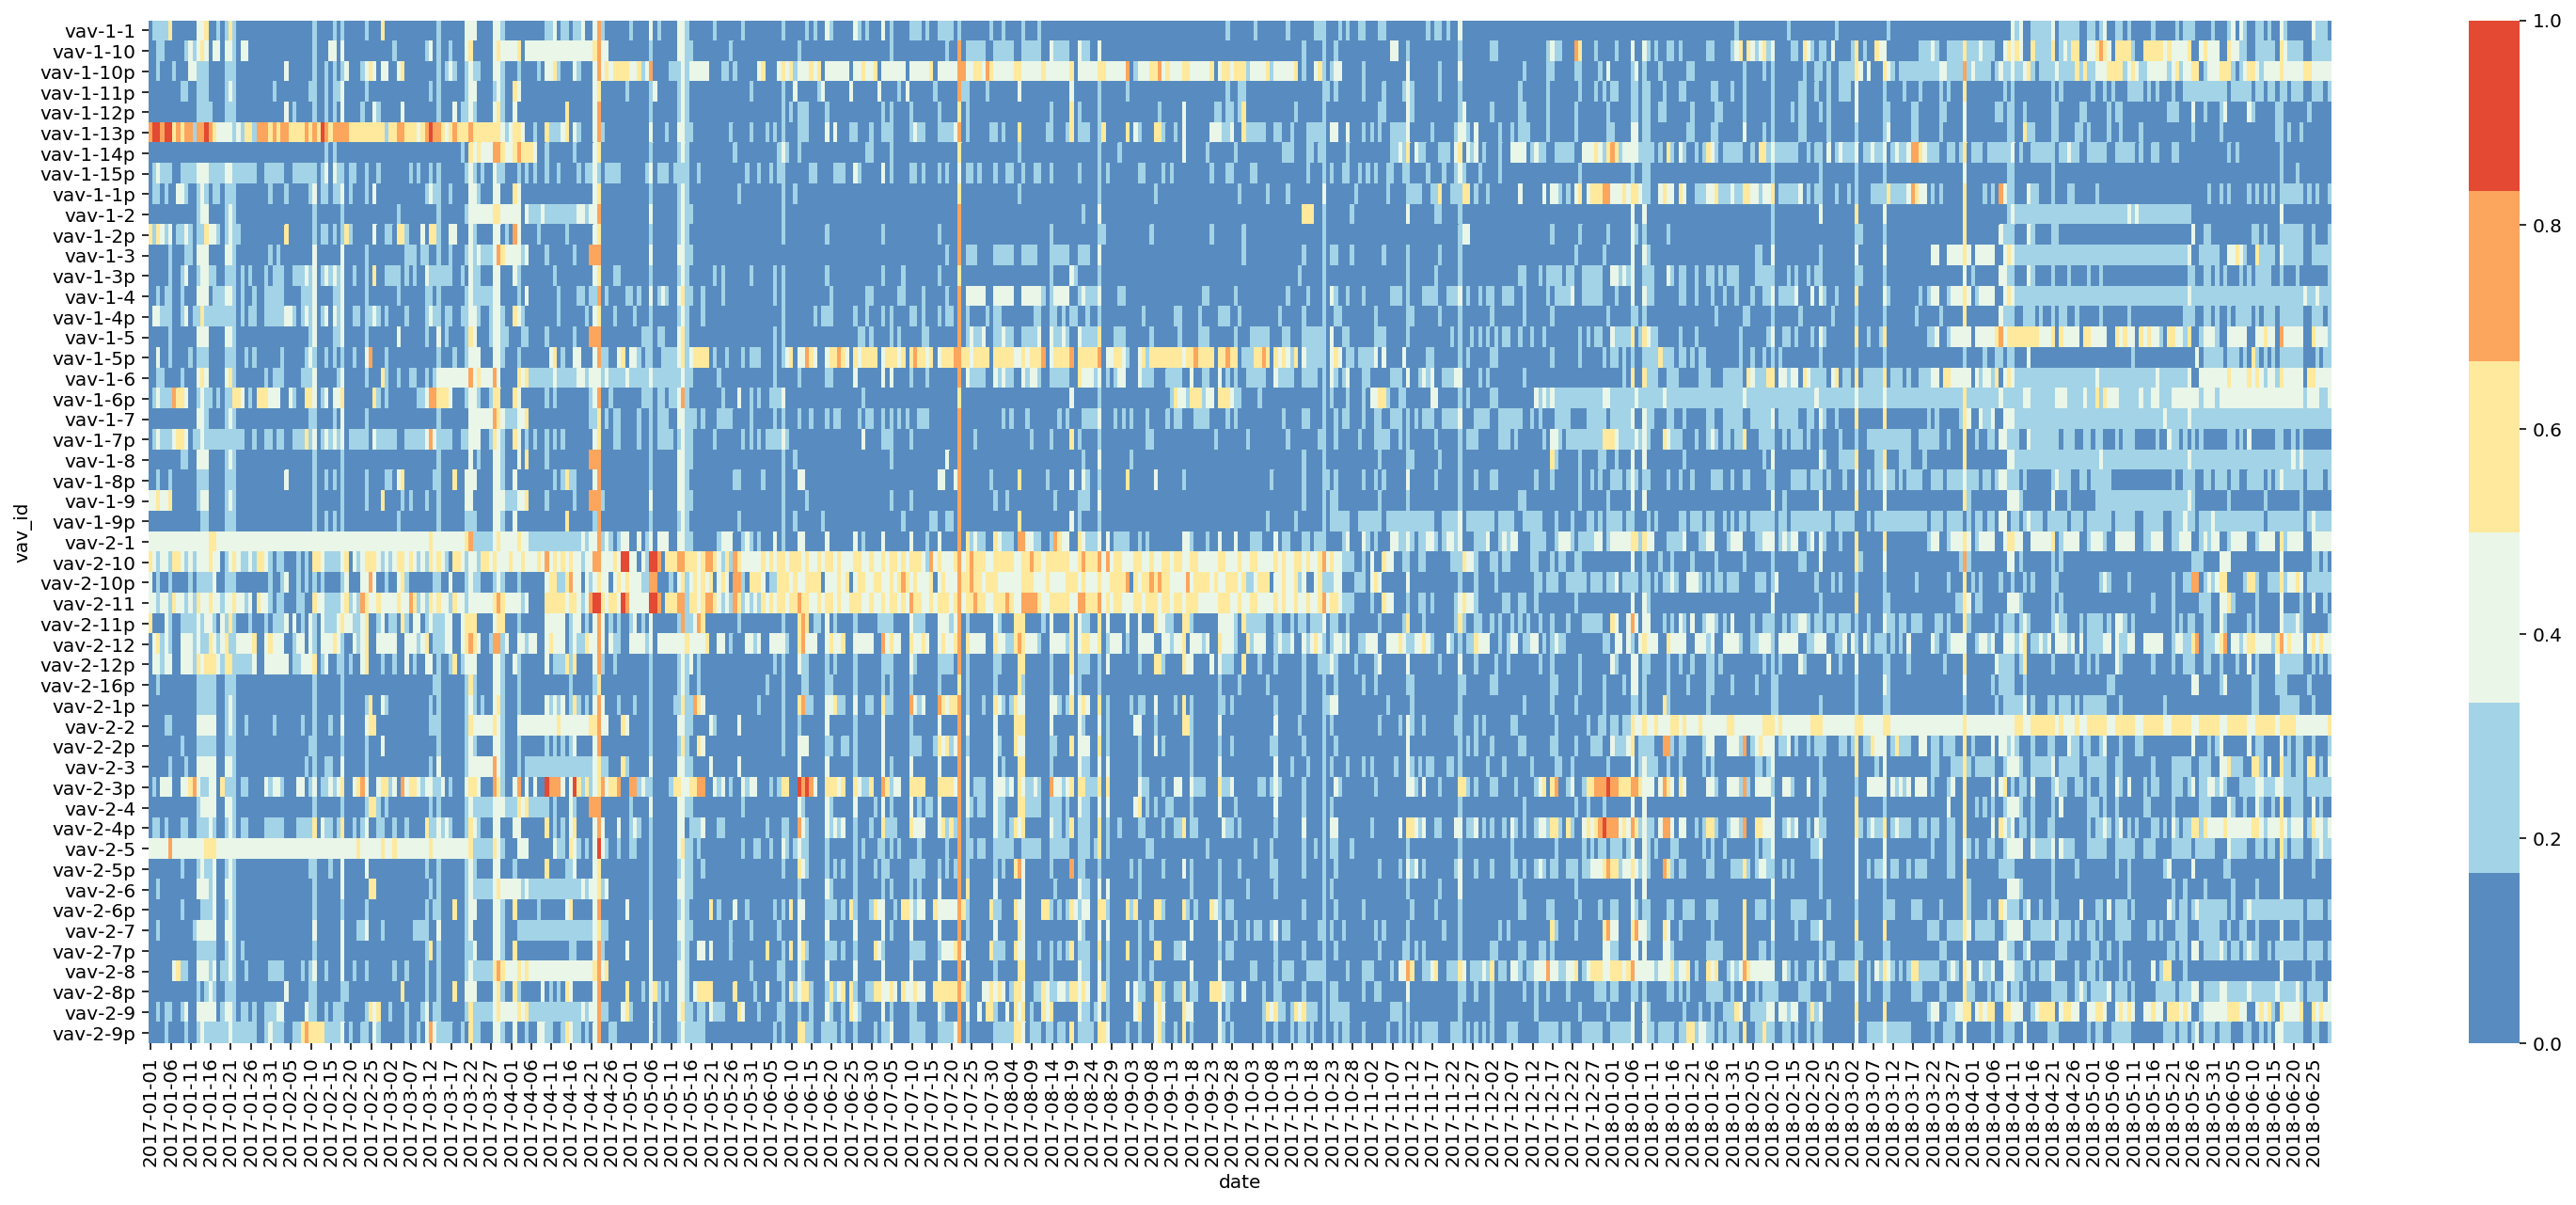

In [11]:
_, ax = plt.subplots(figsize=(26, 10))
sns.heatmap(df.iloc[:, :].T, ax=ax, annot=False, vmin=0, vmax=1, cmap=sns.color_palette('RdYlBu_r'))

In the above figure, each row represents the anomaly score of one VAV (damper position), and each column represents one day.

Many information can be read from this figure alone:

* Single VAV analysis. E.g.: VAV-1-13p seems to have some faults during first 3 months of 2017, but also seems to return to relatively normal after that.
* Cross-VAV comparison. E.g.: VAV-2-10, 2-10p, 2-11, 2-11p seem to be relatively most abnormal devices.
* Extreme points. E.g. there are a few points that look very "abnormal" and worth looking into.

We can get a much better view if we zoom in a little, e.g. just view the first 5 months:

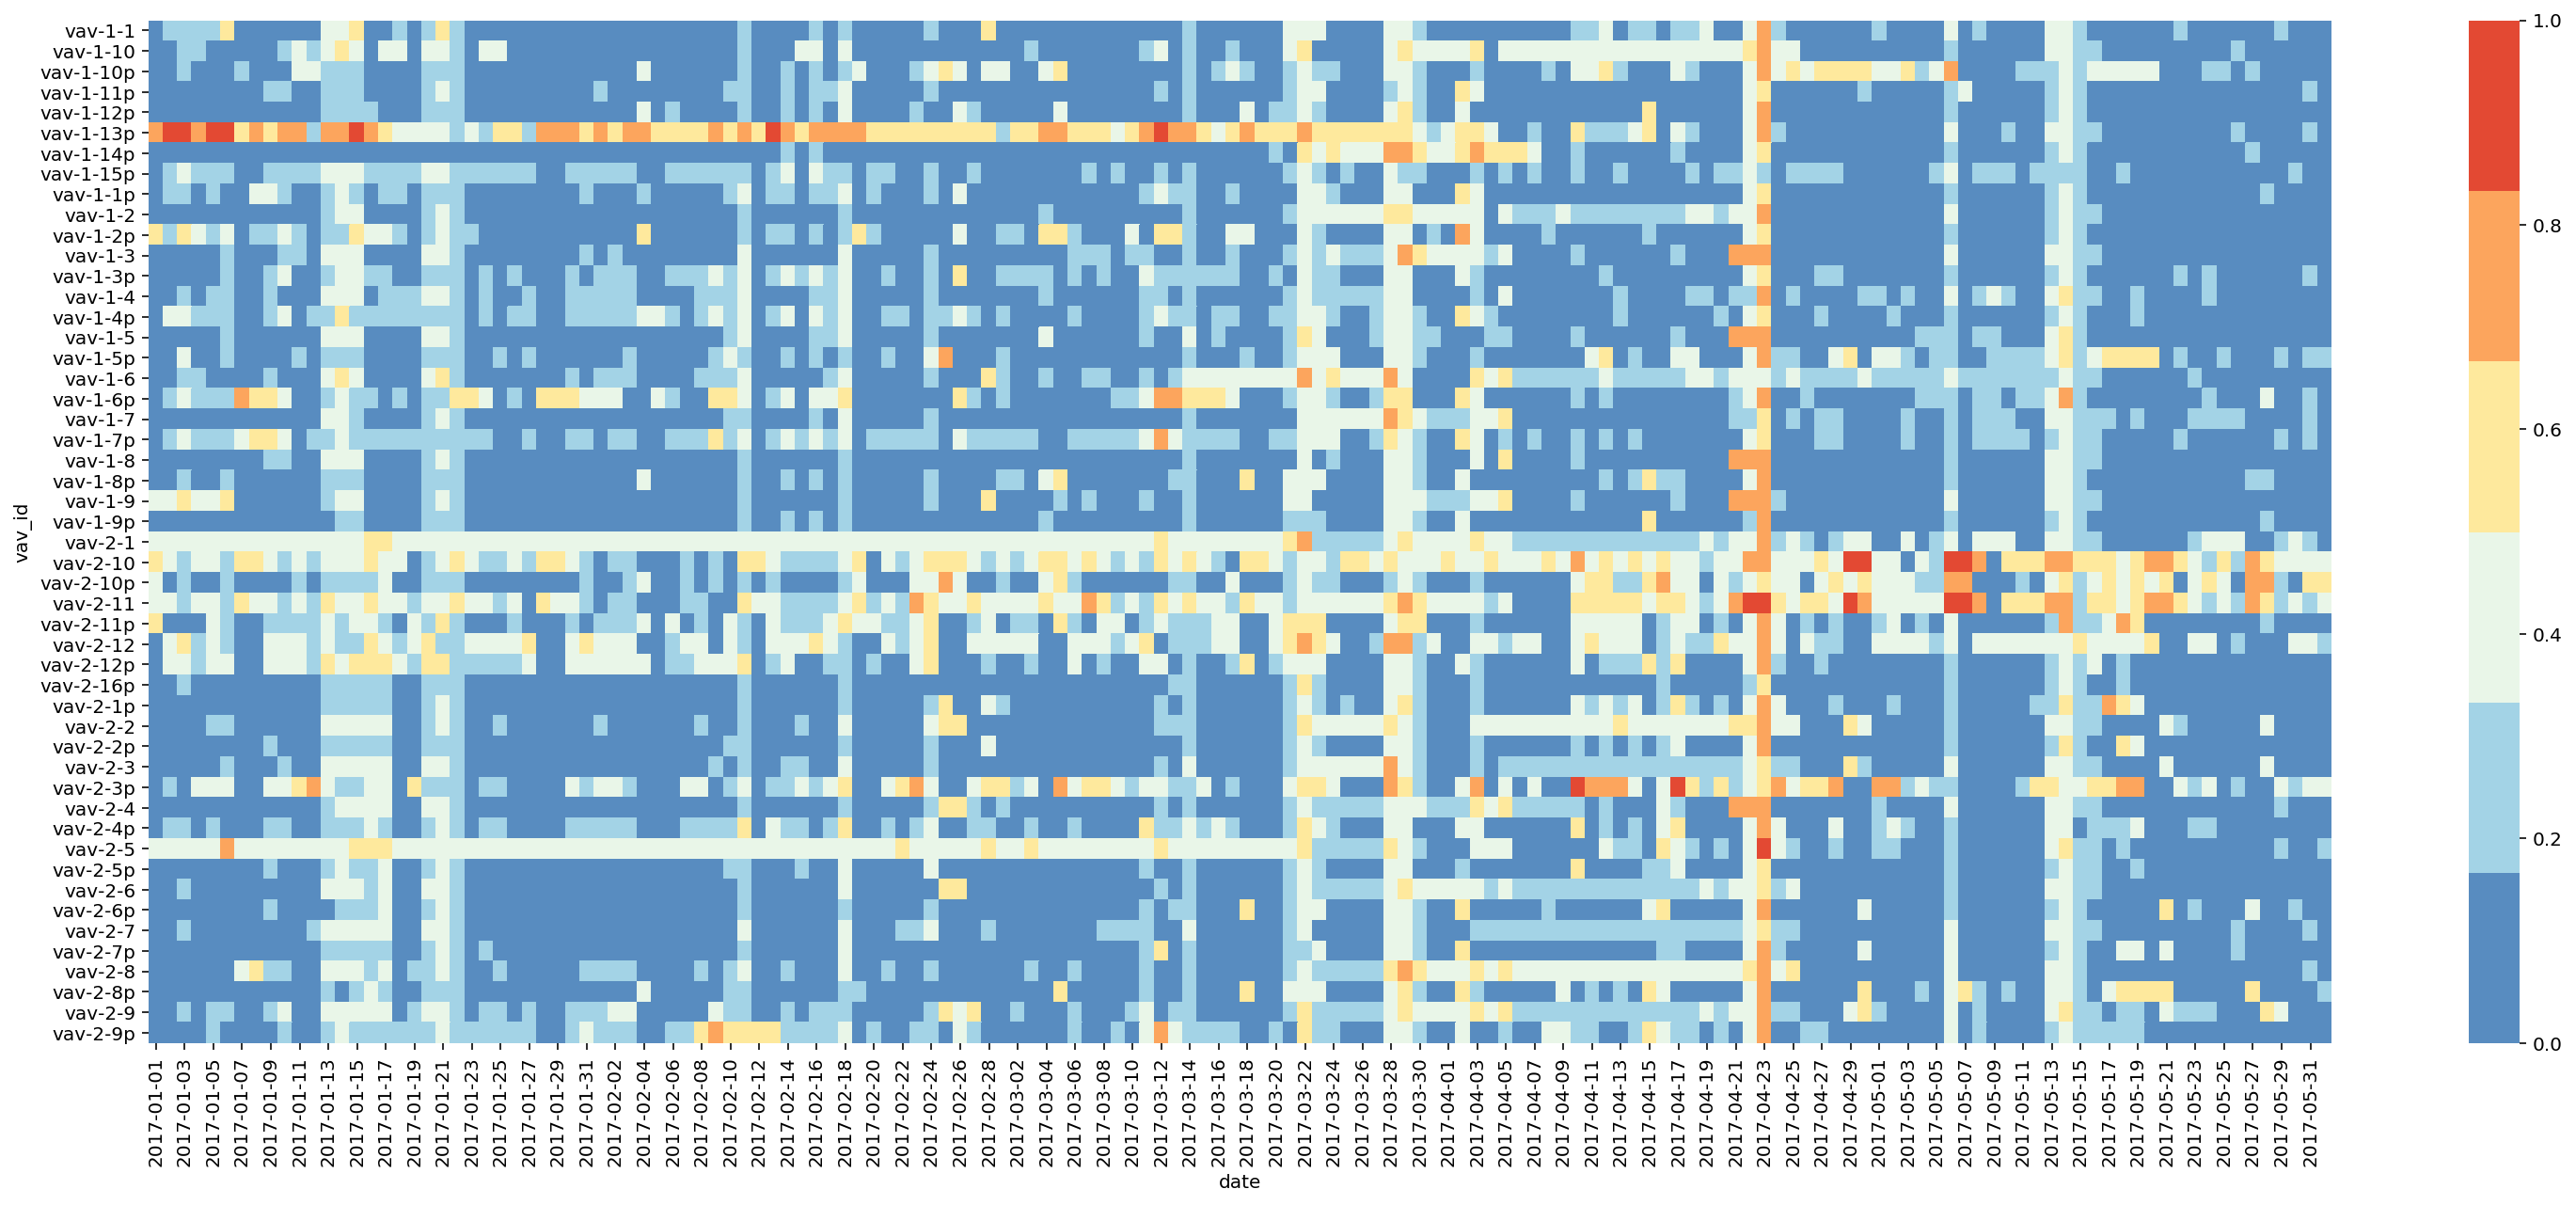

In [12]:
_, ax = plt.subplots(figsize=(26, 10))
sns.heatmap(df.iloc[:152, :].T, ax=ax, annot=False, vmin=0, vmax=1, cmap=sns.color_palette('RdYlBu_r'))

Let's dig in and look at the original data. First define a function to quickly retrieve the original data:

In [13]:
vav_ts_cache = {}
def vav_data(vav_id):
    try:
        return vav_ts_cache[vav_id]
    except KeyError:
        print(f'ID {vav_id} is not in cache. Loading the data.')
        vav_ts_cache[vav_id] = pd.read_csv(f'./VAV_whole_year/utrc_{vav_id}@dmpr_pos_tn.zip',
                                           index_col=0, parse_dates=True)
        return vav_ts_cache[vav_id]

First look at vav-1-13p:

ID vav-1-13p is not in cache. Loading the data.


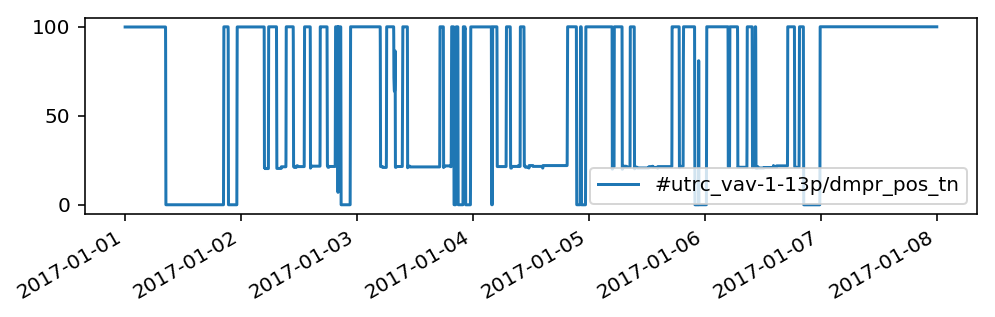

In [14]:
vav_data('vav-1-13p')['2017-01-01': '2017-01-07'].plot(figsize=(8, 2)); plt.legend(loc=4)

For comparison, also plot vav-1-12p:

ID vav-1-12p is not in cache. Loading the data.


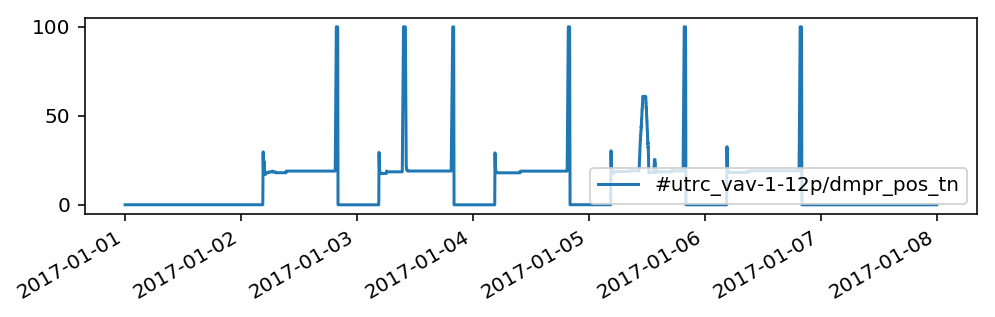

In [15]:
vav_data('vav-1-12p')['2017-01-01': '2017-01-07'].plot(figsize=(8, 2)); plt.legend(loc=4)

VAV-2-5 also looks suspicious:

ID vav-2-5 is not in cache. Loading the data.


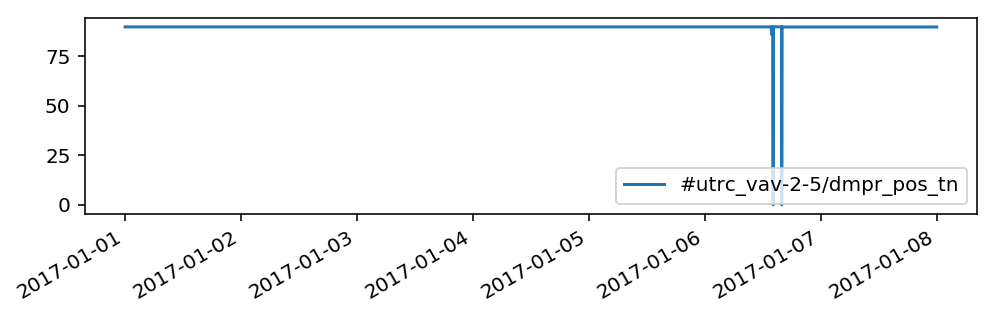

In [16]:
vav_data('vav-2-5')['2017-01-01': '2017-01-07'].plot(figsize=(8, 2)); plt.legend(loc=4)

Quite interestingly, there are two sudden drop in 2017-01-06, and if look back to the heat map, this sudden change is also identified (marked yellow).

Also look at some extremely "anomalous" point:

ID vav-2-11 is not in cache. Loading the data.


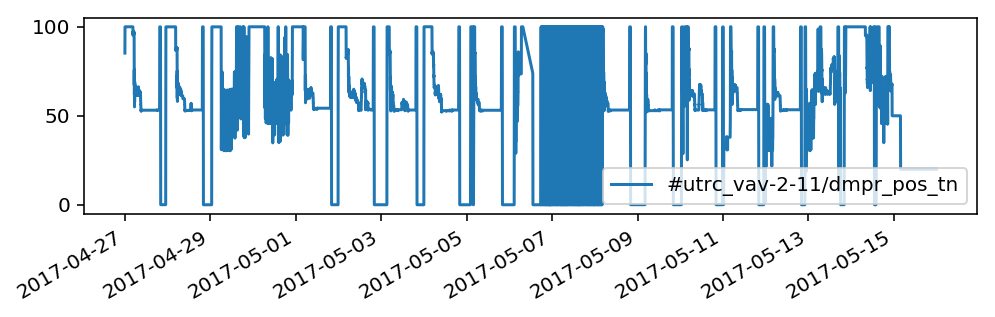

In [17]:
vav_data('vav-2-11')['2017-04-27': '2017-05-15'].plot(figsize=(8, 2)); plt.legend(loc=4)

Repeat the process and more interesting behaviors can be discovered...

# Correlation

It's also of interest to see the correlation between VAVs:

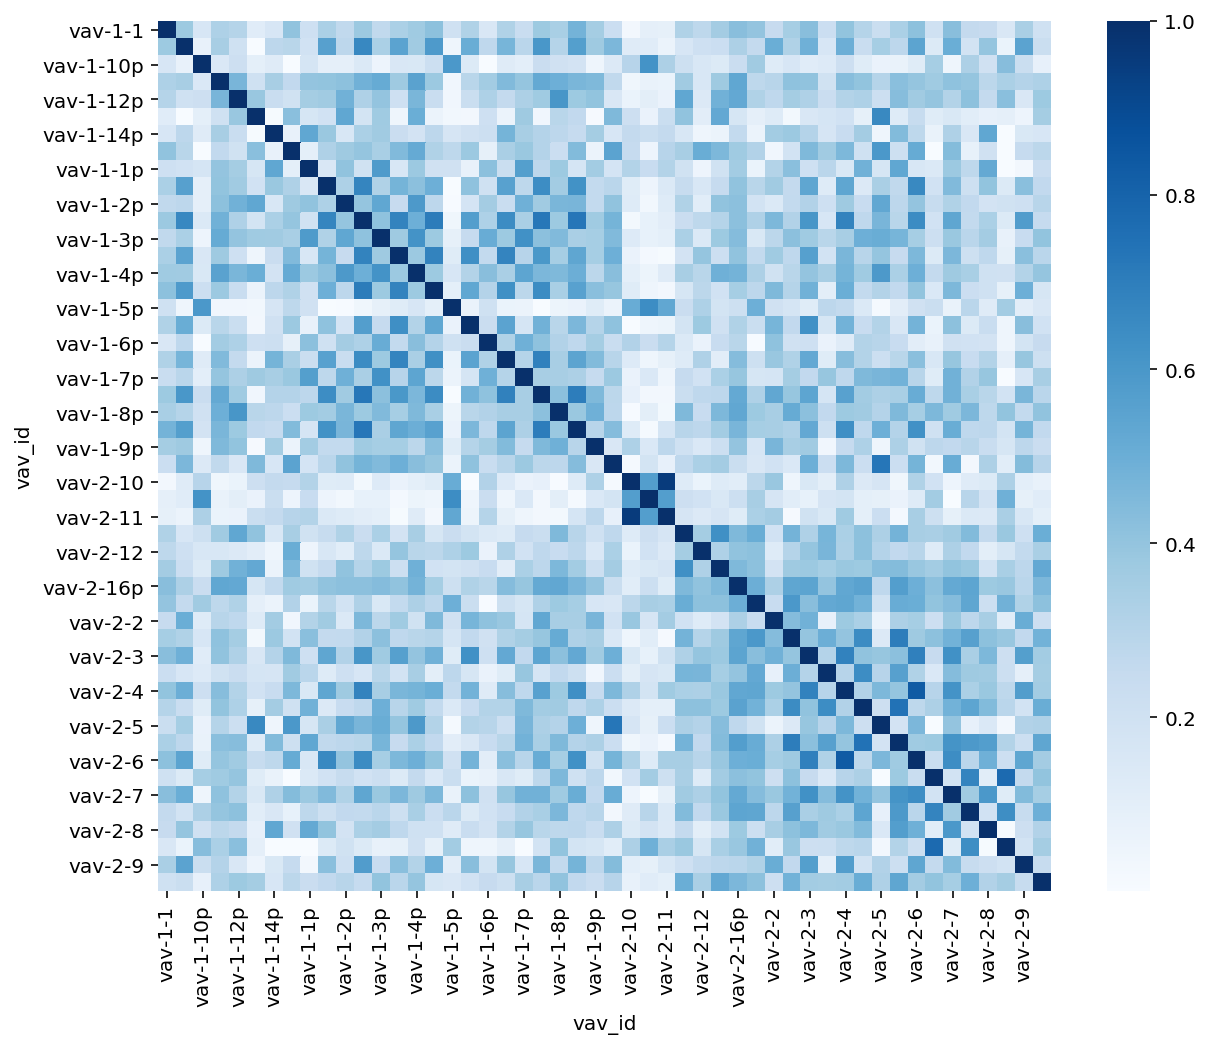

In [18]:
_, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(np.abs(df.corr()), annot=False, ax=ax, cmap='Blues')

# Conclusion

This short case study will stop here. It has shown that the anomaly detection algorithm can **effectively** help users to identify possible anomalies.